In [1]:
import tensorflow as tf

# 自動增長 GPU 記憶體用量
gpu_options = tf.GPUOptions(allow_growth=True)
sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))

# 設定 Keras 使用的 Session
tf.keras.backend.set_session(sess)

/home/wirelab/Documents/wirelab/sg_venv/local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/wirelab/Documents/wirelab/sg_venv/local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/wirelab/Documents/wirelab/sg_venv/local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/wirelab

In [2]:
# https://www.kaggle.com/yassineghouzam/introduction-to-cnn-keras-0-997-top-6
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, Activation
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau




# Set the CNN model 
# my CNN architechture is In -> [[Conv2D->relu]*2 -> MaxPool2D -> Dropout]*2 -> Flatten -> Dense -> Dropout -> Out

def get_cnn():
    model = Sequential()

    model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                     activation ='relu', input_shape = (128,128,3)))
    model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                     activation ='relu'))

    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(Dropout(0.25))


    model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                     activation ='relu'))
    model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                     activation ='relu'))

    model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
    model.add(Dropout(0.25))


    model.add(Flatten())
    model.add(Dense(256, activation = "relu"))
    model.add(Dropout(0.5))
    #model.add(Dense(4, activation = "softmax")) # @@
    model.add(Dense(5, activation = "softmax"))

    optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
    model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])
    return model

Using TensorFlow backend.


In [ ]:
import gc
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_acc', patience=10, restore_best_weights=True)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.8, 
                                            min_lr=0.00001)
#batch_size=256
batch_size = 86

filepath="./cnn_models/cnn_{val_acc:.3f}_batch%s_data-v3" % batch_size
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

for _i in range(10):
    gc.collect()
    
    from keras.preprocessing.image import ImageDataGenerator
    train_datagen = ImageDataGenerator(rescale = 1./255)
    test_datagen = ImageDataGenerator(rescale = 1./255)
    training_set = train_datagen.flow_from_directory('./data_v3/train', target_size = (128, 128), batch_size = batch_size, class_mode = 'categorical', shuffle=True)
    test_set = test_datagen.flow_from_directory('./data_v3/new_test', target_size = (128, 128), batch_size = batch_size, class_mode = 'categorical', shuffle=False)
    
    model = get_cnn()
    history = model.fit_generator(training_set, nb_epoch = 40, validation_data = test_set, callbacks=[early_stop,learning_rate_reduction, checkpoint])

Found 69485 images belonging to 5 classes.
Found 29619 images belonging to 5 classes.


/home/wirelab/Documents/wirelab/sg_venv/local/lib/python3.6/site-packages/ipykernel_launcher.py:28: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
/home/wirelab/Documents/wirelab/sg_venv/local/lib/python3.6/site-packages/ipykernel_launcher.py:28: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=<keras_pre..., callbacks=[<keras.ca..., epochs=40)`


Epoch 1/40
808/808 [==============================] - 116s 144ms/step - loss: 0.8518 - acc: 0.6290 - val_loss: 0.5122 - val_acc: 0.8258

Epoch 00001: val_acc improved from -inf to 0.82582, saving model to ./cnn_models/cnn_0.826_batch86_data-v3
Epoch 2/40
808/808 [==============================] - 113s 140ms/step - loss: 0.0734 - acc: 0.9754 - val_loss: 0.4789 - val_acc: 0.9062

Epoch 00002: val_acc improved from 0.82582 to 0.90621, saving model to ./cnn_models/cnn_0.906_batch86_data-v3
Epoch 3/40
808/808 [==============================] - 113s 140ms/step - loss: 0.0432 - acc: 0.9858 - val_loss: 0.4899 - val_acc: 0.9102

Epoch 00003: val_acc improved from 0.90621 to 0.91016, saving model to ./cnn_models/cnn_0.910_batch86_data-v3
Epoch 4/40
808/808 [==============================] - 113s 140ms/step - loss: 0.0365 - acc: 0.9880 - val_loss: 0.6010 - val_acc: 0.9106

Epoch 00004: val_acc improved from 0.91016 to 0.91056, saving model to ./cnn_models/cnn_0.911_batch86_data-v3
Epoch 5/40
808/

Epoch 1/40
808/808 [==============================] - 114s 141ms/step - loss: 3.0117 - acc: 0.6373 - val_loss: 0.4854 - val_acc: 0.8345

Epoch 00001: val_acc did not improve from 0.91732
Epoch 2/40
808/808 [==============================] - 113s 139ms/step - loss: 0.0654 - acc: 0.9798 - val_loss: 0.4260 - val_acc: 0.9086

Epoch 00002: val_acc did not improve from 0.91732
Epoch 3/40
808/808 [==============================] - 113s 140ms/step - loss: 0.0478 - acc: 0.9861 - val_loss: 0.5021 - val_acc: 0.8904

Epoch 00003: val_acc did not improve from 0.91732
Epoch 4/40
808/808 [==============================] - 113s 140ms/step - loss: 0.0378 - acc: 0.9879 - val_loss: 0.4710 - val_acc: 0.9089

Epoch 00004: val_acc did not improve from 0.91732
Epoch 5/40
808/808 [==============================] - 113s 139ms/step - loss: 0.0349 - acc: 0.9883 - val_loss: 0.6276 - val_acc: 0.9141

Epoch 00005: val_acc did not improve from 0.91732
Epoch 6/40
808/808 [==============================] - 112s 139ms/


Epoch 00005: val_acc did not improve from 0.93045
Epoch 6/40
808/808 [==============================] - 113s 139ms/step - loss: 0.0305 - acc: 0.9907 - val_loss: 0.4005 - val_acc: 0.9192

Epoch 00006: val_acc did not improve from 0.93045
Epoch 7/40
808/808 [==============================] - 113s 139ms/step - loss: 0.0330 - acc: 0.9895 - val_loss: 0.5513 - val_acc: 0.9073

Epoch 00007: val_acc did not improve from 0.93045
Epoch 8/40
808/808 [==============================] - 113s 140ms/step - loss: 0.0278 - acc: 0.9905 - val_loss: 0.4409 - val_acc: 0.9166

Epoch 00008: val_acc did not improve from 0.93045
Epoch 9/40
808/808 [==============================] - 113s 140ms/step - loss: 0.0295 - acc: 0.9906 - val_loss: 0.9424 - val_acc: 0.9002

Epoch 00009: ReduceLROnPlateau reducing learning rate to 0.000800000037997961.

Epoch 00009: val_acc did not improve from 0.93045
Epoch 10/40
455/808 [===============>..............] - ETA: 37s - loss: 0.0185 - acc: 0.9932

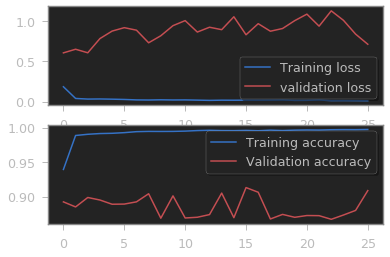

In [4]:
import matplotlib.pyplot as plt
# Plot the loss and accuracy curves for training and validation 
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_acc'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

# Evaluation

In [1]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [2]:
from keras.preprocessing.image import ImageDataGenerator

old_test_datagen = ImageDataGenerator(rescale = 1./255)
new_test_datagen = ImageDataGenerator(rescale = 1./255)
old_test_set = old_test_datagen.flow_from_directory('./data_v3/old_test', target_size = (128, 128), batch_size = 256, class_mode = 'categorical', shuffle=False)
new_test_set = new_test_datagen.flow_from_directory('./data_v3/new_test', target_size = (128, 128), batch_size = 256, class_mode = 'categorical', shuffle=False)

Using TensorFlow backend.
/home/wirelab/Documents/wirelab/sg_venv/local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/wirelab/Documents/wirelab/sg_venv/local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/wirelab/Documents/wirelab/sg_venv/local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np

Found 42690 images belonging to 5 classes.
Found 29619 images belonging to 5 classes.


In [3]:
from keras.models import load_model
model = load_model('./cnn_models/cnn_0.930_batch86_data-v3')

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.


## Old Test

              precision    recall  f1-score   support

       Other     0.9880    0.9354    0.9610      7645
         HSR     0.9472    0.8535    0.8979      4961
         MRT     0.9890    0.9650    0.9768      3716
          RW     0.9494    0.9853    0.9670     21428
          HW     0.9654    1.0000    0.9824      4940

    accuracy                         0.9610     42690
   macro avg     0.9678    0.9478    0.9570     42690
weighted avg     0.9614    0.9610    0.9605     42690



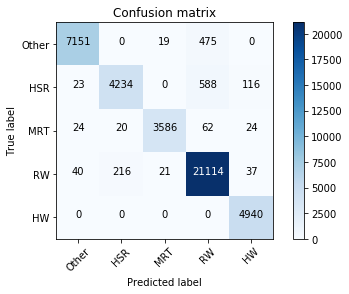

In [4]:
import numpy as np
#classes_names = ['HSR','MRT','RW','HW'] # @@
classes_names = ['Other','HSR','MRT','RW','HW']
# Predict the values from the validation dataset
Y_pred = model.predict_generator(old_test_set)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Y_pred_classes = np.rint(Y_pred)
# Convert validation observations to one hot vectors
Y_true = old_test_set.classes

'''Confusuin Matrix'''
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = classes_names) 

'''Classification Report'''
from sklearn.metrics import classification_report
print(classification_report(Y_true, Y_pred_classes, target_names=classes_names,digits=4))

## New Test

              precision    recall  f1-score   support

       Other     0.7288    0.8156    0.7697       705
         HSR     0.9870    0.9181    0.9513     12488
         MRT     0.9929    0.9470    0.9694      4754
          RW     0.8218    0.9404    0.8771      6002
          HW     0.9245    0.9476    0.9359      5670

    accuracy                         0.9305     29619
   macro avg     0.8910    0.9137    0.9007     29619
weighted avg     0.9364    0.9305    0.9319     29619



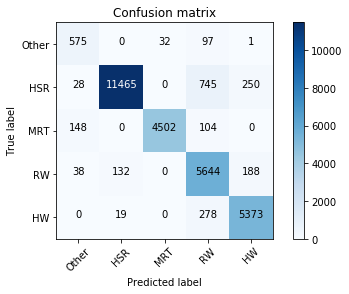

In [5]:
import numpy as np
#classes_names = ['HSR','MRT','RW','HW'] # @@
classes_names = ['Other','HSR','MRT','RW','HW']
# Predict the values from the validation dataset
Y_pred = model.predict_generator(new_test_set)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Y_pred_classes = np.rint(Y_pred)
# Convert validation observations to one hot vectors
Y_true = new_test_set.classes

'''Confusuin Matrix'''
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = classes_names) 

'''Classification Report'''
from sklearn.metrics import classification_report
print(classification_report(Y_true, Y_pred_classes, target_names=classes_names, digits=4))